</a>
    <img src="logo_APL.png" width="400" align="center">
</a>

<h1>Análise Exploratória dos Dados em Python</h1>

**Bem vindo!** Neste notebook serão discutidoas ferramentas para a Análise Exploratória dos Dados. Trata-se do processo de conversão de dados do formato inicial para um formato que pode ser melhor para análise. Ao final, espera-se que você seja capaz de você usar as ferramentas de captura, limpeza, análise e visualização dos dados. 

<h2>Conteúdo:</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
        <li> Introdução </li>  
        <li> Gráficos de Dispersão </li> 
        <li> Correlação </li>   
        <li> Fundamentos de Regressão Linear </li> 
</div>

<hr>

# Introdução

Vamos codificar algumas das principais ferramentas estatísticas, como cálculo da média, desvio padrão, correlação, entre outros. 

Iniciamos carregando os pacotes `Python` necessários:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

Vamos começar lendo o nosso dataset.

In [2]:
df = pd.read_csv("dados.csv")
print(df.head(8))

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000  12031.25
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55
5         917        1     1.0    1.0    60  Botafogo  630000  10500.00
6         850        1     1.0    1.0    65  Botafogo  740000  11384.62
7         350        1     1.0    1.0    43  Botafogo  570000  13255.81


# Gráficos de Dispersão
Como vimos anteriormente, gráficos de dispersão são fornecidos pela biblioteca `Pandas`. 

No nosso exemplo, vamos ver a relação entre o _Preço_ e o _Area_.

<AxesSubplot:xlabel='preco', ylabel='area'>

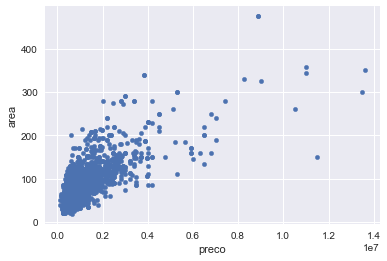

In [76]:
df.plot.scatter(x='preco', y='area')

## Matriz de gráficos de dispersão
Objetivo de visualizar se existe correlação entre cada par de atributos. 

No nosso exemplo vamos usar as variáveis contínuas: _condomínio_, _preço_, _preço/m2_ e _área_.

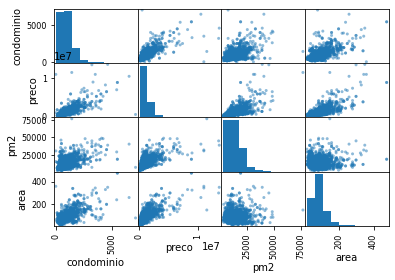

In [23]:
pd.plotting.scatter_matrix(df[['condominio', 'preco', 'pm2', 'area']]);

### Gráficos de distribuição conjunta fornecidos pela biblioteca `Seaborn`. 
No nosso exemplo vamos ver a distribuição conjunta  entre o _Preço_ e o _Area_, exibindo uma relação entre essas duas variáveis, assim como perfis 1D (histogramas) nas laterais dos eixos.

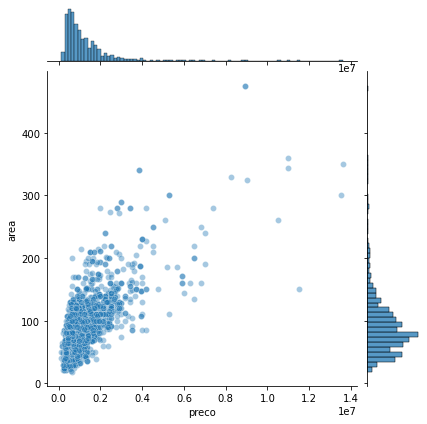

In [25]:
sns.jointplot(data=df, x='preco', y='area', alpha=0.4);

### Matriz de dispersão da biblioteca `Seaborn`
No nosso exemplo vamos usar as variáveis contínuas: _condomínio_, _preço_, _preço/m2_ e _área_.

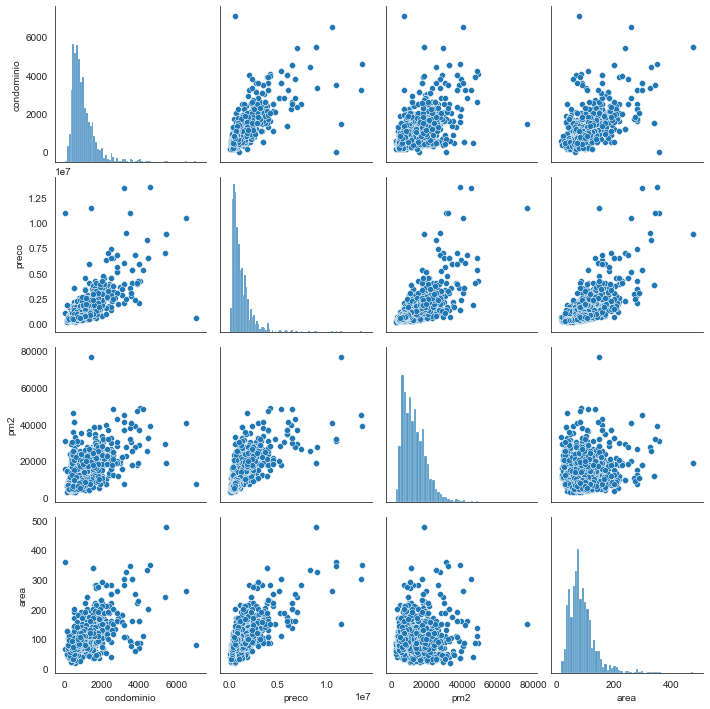

In [40]:
sns.pairplot(df[['condominio', 'preco', 'pm2', 'area']])

# Correlação vs Causalidade
**Correlação**: uma medida da extensão da interdependência entre as variáveis.

**Causalidade**: a relação entre causa e efeito entre duas variáveis.

É importante saber a diferença entre os dois e que a **correlação não implica causalidade**. Determinar a correlação é muito mais simples do que determinar a causalidade.

Calculando a **correlação** entre as features do nosso dataset.

In [20]:
df.corr().round(2)

,condominio,quartos,suites,vagas,area,preco,pm2
condominio,1.00,0.42,0.31,0.36,0.65,0.74,0.49
quartos,0.42,1.00,0.27,0.35,0.68,0.41,0.01
suites,0.31,0.27,1.00,0.26,0.32,0.31,0.17
vagas,0.36,0.35,0.26,1.00,0.44,0.39,0.13
area,0.65,0.68,0.32,0.44,1.00,0.72,0.11
preco,0.74,0.41,0.31,0.39,0.72,1.00,0.68
pm2,0.49,0.01,0.17,0.13,0.11,0.68,1.00


A visualização por meio de uma figura pode facilitar nossa análise. Ovserve que as tonalidades de diferentes cores auxiliam na identificação do valor da **correlação**. A discussão de **causalidade** está fora do noso escopo neste momento.

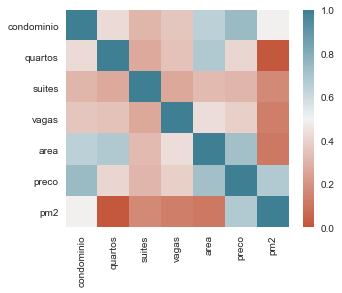

In [29]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(df.corr(), vmin=-0, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

#plt.tight_layout()
plt.show()

Pela análise desse gráfico pode-se observar que existe uma correlação alta entre a _area_ e o _preco_ (residências com maior área construída tendem a possuir um maior preço). Também existe uma correlação alta entre o valor do _condominio_ e _preço_. 

Por outro lado,  existe uma correlação fraca entre a variável _vagas_ e _pm2_ (preço/m2). E uma correlação mais fraca ainda (quase nula) entre _quartos_ e _pm2_. Em outras palavras, outras features contribuem mais para o valor do preço/m2 que o numero de quartos e a quantidade de vagas.

## Fundamentos de Regressão Linear

O conceito de Regressão Linear pode ser entendido como um conjunto de ferramentas que tenta estabelecer uma relação linear entre variáveis. Graficamente, processo de traçar uma reta através dos dados em um diagrama de dispersão. Portanto, pode complementar a análise de correlação. 

Pela análise do gráfico de correlação, pôde-se observar uma correlação alta tanto entre a _area_ e o _preco_ quanto entre o valor do _condominio_ e _preço_. Isso é confirmado pela análise dos gráficos a seguir: _area_ vs _preco_ (esquerda) e _condominio_ vs _preço_ (direita).

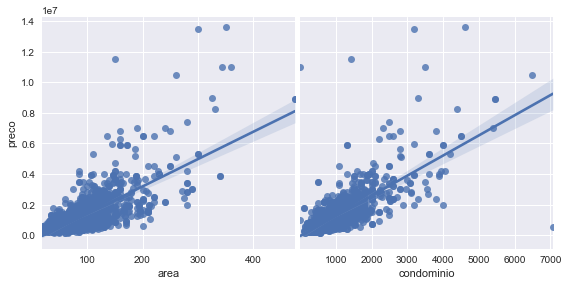

In [80]:
sns.pairplot(df, x_vars=["area", "condominio"], y_vars=["preco"], height=4, aspect=1, kind="reg");

Ainda, pela análise do gráfico de correlação, pôde-se observar uma correlação fraca entre a variável _vagas_ e _pm2_. E uma correlação quase nula entre _quartos_ e _pm2_. Isso é confirmado pela análise dos gráficos a seguir.

Observe que a inclinação do gráfico _quartos_ vs _pm2_ (esquerda) é menor que a inclinação no gráfico _vagas_ vs  _pm2_ (direita).

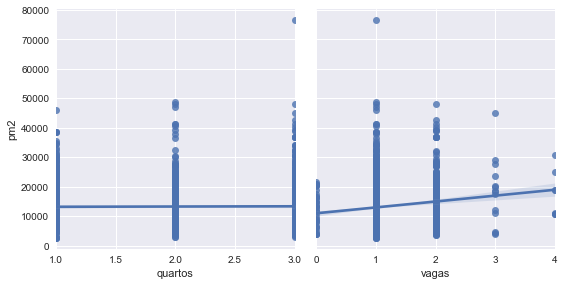

In [82]:
sns.pairplot(df, x_vars=["quartos", "vagas"], y_vars=["pm2"], height=4, aspect=1, kind="reg");

### Relacionando três variáveis

Os gráficos a seguir detalham a relação entre _vagas_ e _pm2_ em função do bairro.

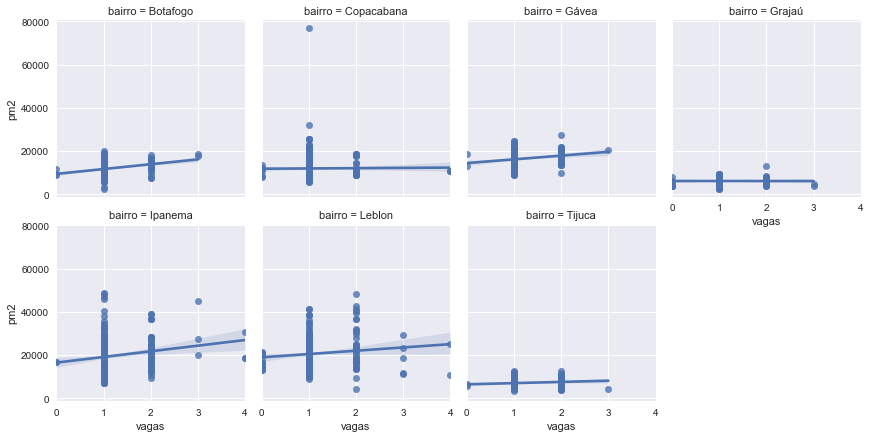

In [72]:
sns.lmplot(x="vagas", y="pm2", col='bairro', data=df,col_wrap=4, height=3)

Outra forma de se visualizar essa relação é por meio de uma tabela que relaciona: Bairro, numero de vagas e Preço/m2

In [77]:
df_1 = df[['bairro','pm2','vagas']]
grouped_test1 = df_1.groupby(['bairro','vagas'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='bairro',columns='vagas')
grouped_pivot.round(2)

pm2                                        
vagas            0.0       1.0       2.0       3.0       4.0
bairro                                                      
Botafogo    10077.97  11678.20  13792.44  18026.52       NaN
Copacabana  10803.12  11964.11  12398.93       NaN  10800.00
Grajaú       4974.05   6213.76   6102.21   4375.00       NaN
Gávea       15861.48  16135.61  17926.66  20325.20       NaN
Ipanema     16633.33  19132.64  21769.55  30897.44  22704.78
Leblon      17663.78  20463.62  23534.84  18846.15  17950.00
Tijuca       6312.96   7059.53   7776.08   4225.35       NaN

O valor `NaN` indica que não existe um valor numérioco. Dessa forma, na base de dados utilizada, não existem residências com 3 vagas em Copacana. Assim como não existem residências com 4 vagas nos bairros de Botafogo, Grajaú, Gávea e Tijuca.

Observa-se que quase não existe variação do Preço/m2 no Bairro de Copacabana em função do numero de vagas, por isso a inclinação do reta é quase nulano gráfico correspondente. O mesmo vale para os bairros de Grajaú e Tijuca.